# Assignment 3: Frequency Domain
Tổng quan: Ở bài tập này, chúng ta sẽ thực hành lập trình một số hàm xử lí trong miền tần số
- Chuyển đổi giữa miền không gian và miền tần số
- Lọc trong miền tần số: lọc thông thấp, lọc thông cao

## I. Chuyển đổi giữa miền không gian và miền tần số
Trong miền không gian, ta xử lý trực tiếp trên từng điểm ảnh, còn trong miền tần số, ta xử lý dựa trên tốc độ thay đổi giá trị ảnh trong miền không gian.
- Miền không gian: Ma trận ảnh đầu vào -> Xử lý -> Ma trận ảnh đầu ra
- Miền tần số: Ảnh vào -> Phân bố tần số -> Xử lý -> Chuyển đổi ngược -> Ảnh ra

Biến đổi Fourier thường được dùng để chuyển ảnh từ miền không gian sang miền tần số.

Một số hàm chuyển đổi và xử lý trong miền tần số:
- cv2.dft(): biến đổi Fourrier https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gadd6cf9baf2b8b704a11b5f04aaf4f39d
- cv2.idft(): biến đổi Fourrier ngược https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gaa708aa2d2e57a508f968eb0f69aa5ff1 
- np.fft.fft2(): https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html
- np.fft.fftshift(): https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html
- cv2.cartToPolar(): https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gac5f92f48ec32cacf5275969c33ee837d
- cv2.polarToCart(): https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga581ff9d44201de2dd1b40a50db93d665


In [1]:
from matplotlib.colors import NoNorm
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

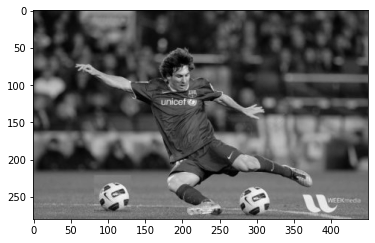

In [2]:
# read input as grayscale
img = cv2.imread("images/messi.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

### Chuyển sang miền tần số sử dung biến đổi Fourier

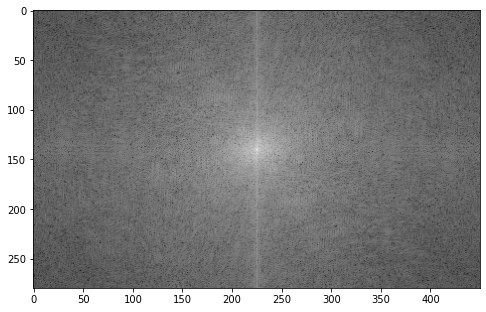

In [3]:
# convert image to floats and do dft saving as complex output
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

# apply shift of origin from upper left corner to center of image
dft_shift = np.fft.fftshift(dft)
# De quan sat, neu khong dung thi moi chinh giua la sang
magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fig = plt.figure(figsize=(8,8))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

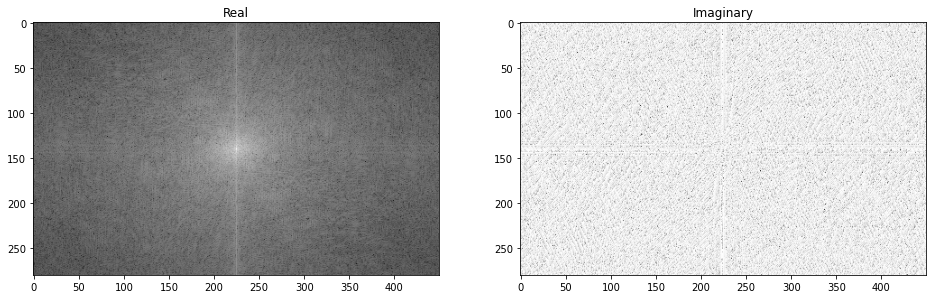

In [4]:
# display real and imaginary components
real, imag = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])

real = np.log(real) #/ 30
imag = np.log(imag) #/ 30

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax1.title.set_text('Real')
plt.imshow(real, cmap='gray')
ax2 = fig.add_subplot(122)
ax2.title.set_text('Imaginary')
plt.imshow(imag, cmap='gray')
plt.show()

### Biến đổi từ miền tần số về miền không gian (biến đổi Fourier ngược)

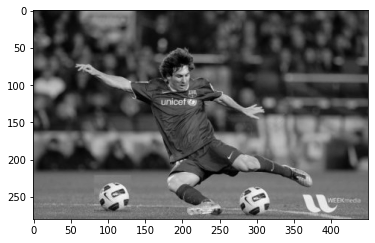

In [5]:
# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)
# do idft saving as complex output
img_back = cv2.idft(back_ishift)
# combine complex components into original image again
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
# re-normalize to 8-bits
img_back = cv2.normalize(img_back, None, alpha=0, beta=255, norm_type = cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.imshow(img_back, cmap='gray')
plt.show()

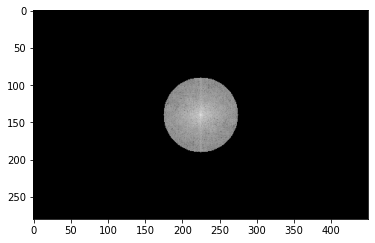

In [6]:
# low pass filter example
center = np.array(img.shape)/2
rad = 50
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if np.linalg.norm(np.array((i,j)) - center) > rad:
      magnitude_spectrum[i,j] = 0
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

## II. Lọc ảnh trong miền tần số

Để thực hiện lọc ảnh trong miền tần số, các bước chính
- Chuyển ảnh từ miền không gian sang miền tần số
- Thực hiện lọc bỏ 1 số tín hiệu ở tần số không mong muốn (tần số thấp, cao, tần số của nhiễu sin, ...)
- Chuyển ngược từ miền tần số sang miền không gian

## Loại bỏ nhiễu sin (thủ công)

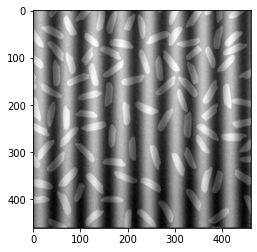

In [7]:
img = cv2.imread('images/gao.png',0)
plt.imshow(img, cmap = 'gray')
plt.show()

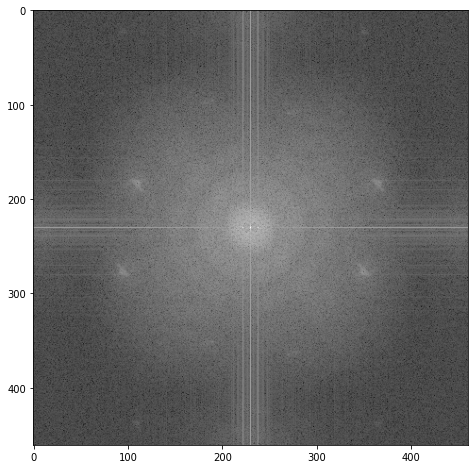

In [8]:

## Biến đổi sang miền tần số
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(8,8))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()


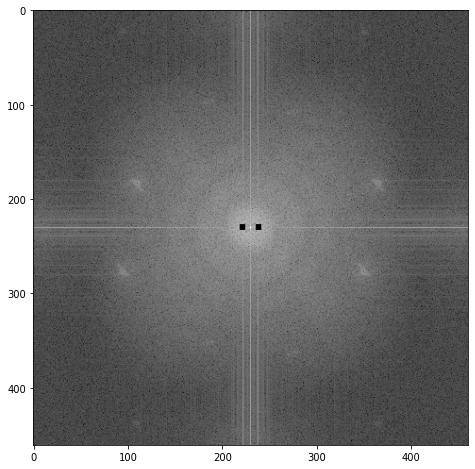

In [9]:
# loại bỏ hệ số ở tần số của nhiễu sin

dft_shift[227:233, 236:242] = 0
dft_shift[227:233, 219:225] = 0
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])+1)
plt.figure(figsize=(8,8))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()


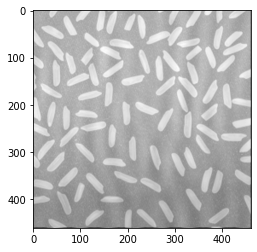

In [10]:
# biến đổi ngược
dft_ishift = np.fft.ifftshift(dft_shift)
idft = cv2.idft(dft_ishift)
img_back = cv2.magnitude(idft[:,:,0],idft[:,:,1])
plt.imshow(img_back, cmap = 'gray')
plt.show()

## Lọc thông thấp
- Chuyển sang miền tần số
- Tạo mặt nạ có kích thước bằng kích thước ảnh
- Nhân mặt nạ với ma trận hệ số fourrier
- Biến đổi ngược Fourrier

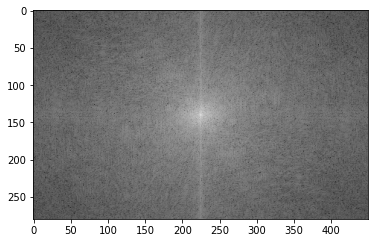

In [15]:
## Đọc ảnh và chuyển sang miền tần số
input_image = cv2.imread('images/messi.jpg', 0)

fft = np.fft.fft2(input_image)
shift_fft = np.fft.fftshift(fft)

# showing purpose only
mag_dft = np.log(np.abs(shift_fft))
plt.imshow(mag_dft, cmap='gray')
plt.show()

### Hàm tạo mặt nạ cho bộ lọc thông thấp

In [12]:
# tạo mặt nạ cho bộ lọc thông thấp 
# shape: kích thước mặt nạ muốn tạo
# cutoff: tần số cắt 
def get_ideal_low_pass_filter(shape, cutoff):
  d0 = cutoff
  rows, columns = shape
  mask = np.zeros((rows, columns), dtype=int)
  mid_R, mid_C = int(rows/2), int(columns/2)
  for i in range(rows):
    for j in range(columns):
      d = math.sqrt((i - mid_R) **2 + (j - mid_C)**2) # Tinh khoang cach toi tam
      if (d <= d0):
        mask[i,j] = 1
      else:
        mask[i,j] = 0
  return mask

Yêu cầu: Tạo mặt nạ
- Lấy shape của ảnh đầu vào
- Lựa chọn cutoff
- Chuẩn bị bộ lọc mask (sử dụng hàm có sẵn ở trên)

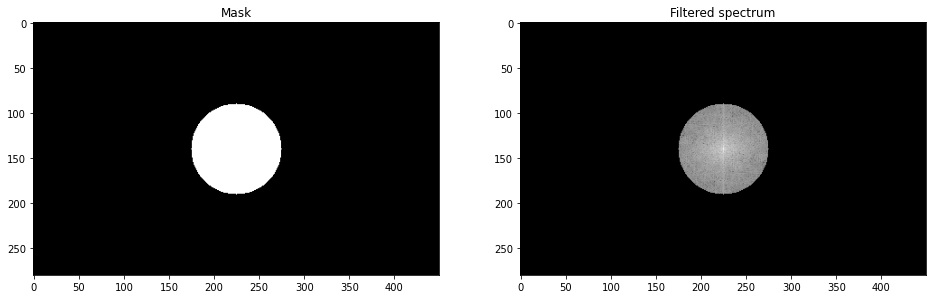

In [26]:
## Tạo mặt nạ
### YOUR CODE HERE ###
shape = np.shape(input_image)
cutoff = 50
mask = get_ideal_low_pass_filter(shape, cutoff)
### YOUR CODE HERE ###

## Nhân mặt nạ với bộ lọc để loại bỏ các tần số không quan tâm
filtered_image = np.multiply(mask, shift_fft)
mag_filtered_dft = np.log(np.abs(filtered_image) + 1)

# showing purpose only
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax1.title.set_text('Mask')
plt.imshow(mask, cmap='gray')
ax2 = fig.add_subplot(122)
ax2.title.set_text('Filtered spectrum')
plt.imshow(mag_filtered_dft, cmap='gray')
plt.show()

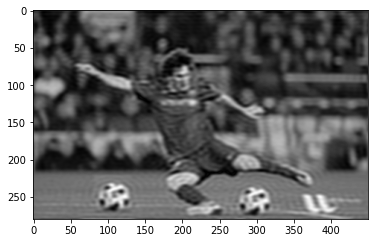

In [27]:
## Biến đổi ngược Fourrier để chuyển về miền không gian
shift_ifft = np.fft.ifftshift(filtered_image)
ifft = np.fft.ifft2(shift_ifft)
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()

## Lọc thông cao

Các bước tương tự lọc thông thấp

Yêu cầu: Hoàn thành hàm xây dựng bộ lọc thông cao và áp dụng vào ảnh

In [30]:
## Hàm tạo mặt nạ cho bộ lọc thông cao
## shape: kích thước mặt nạ mong muốn
## cutoff: tần số cắt
def get_ideal_high_pass_filter(shape, cutoff):
  mask = 1 - get_ideal_low_pass_filter(shape, cutoff)
  return mask
    

#### Thực hiện lọc thông cao 

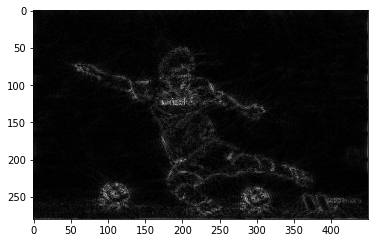

In [31]:
input_image = cv2.imread('images/messi.jpg', 0)

### YOUR CODE HERE ###
# Chuyển sang miền tần số
fft = np.fft.fft2(input_image)
shift_fft = np.fft.fftshift(fft)
# tạo mặt nạ
shape = np.shape(input_image)
cutoff = 60
mask = get_ideal_high_pass_filter(shape, cutoff)
# lọc
filter_image = np.multiply(mask, shift_fft)
# biến đổi ngược
shift_ifft = np.fft.ifftshift(filter_image)
ifft = np.fft.ifft2(shift_ifft)
mag = np.abs(ifft)
### YOUR CODE HERE ###

# showing purpose only
plt.imshow(mag, cmap='gray')
plt.show()

# Lọc theo đoạn

Yêu cầu: Hoàn thành hàm xây dựng bộ lọc theo đoạn và áp dụng vào ảnh

In [34]:
## Tạo mặt nạ lọc theo đoạn
## shape: kích thước mặt nạ 
## cutoff1, cutoff2: 2 tần số cắt, cutoff1< cutoff2

def get_ideal_band_pass_filter(shape, cutoff1, cutoff2):
  d0 = cutoff1
  d1 = cutoff2
  rows, columns = shape
  mask = np.zeros((rows, columns), dtype=int)
  mid_R, mid_C = int(rows/2), int(columns/2)
  for i in range(rows):
    for j in range(columns):
      d = math.sqrt((i - mid_R) **2 + (j - mid_C)**2) # Tinh khoang cach toi tam
      if (d0 <= d and d <= d1):
        mask[i,j] = 1
      else:
        mask[i,j] = 0
  return mask

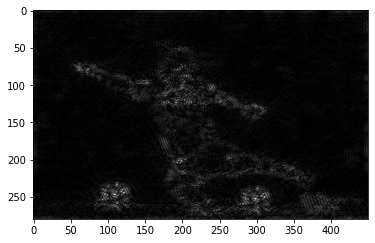

In [36]:
## Thực hiện lọc ảnh theo đoạn
input_image = cv2.imread('images/messi.jpg', 0)

### YOUR CODE HERE ###
fft = np.fft.fft2(input_image)
shift_fft = np.fft.fftshift(fft)

shape = np.shape(input_image)
cutoff1 = 50
cutoff2 = 100
mask = get_ideal_band_pass_filter(shape, cutoff1, cutoff2)


filter_image = np.multiply(mask, shift_fft)

shift_ifft = np.fft.ifftshift(filter_image)
ifft = np.fft.ifft2(shift_ifft)
mag = np.abs(ifft)

### YOUR CODE HERE ###

# showing purpose only
plt.imshow(mag, cmap='gray')
plt.show()

## Lọc thông thấp với mặt nạ Gauss
Tạo mặt nạ để lọc thông thấp trong miền tần số có dạng hàm Gauss

Yêu cầu: Hoàn thành hàm xây dựng bộ lọc thông thấp với bộ lọc Gauss và áp dụng vào ảnh

$$\Large mask[i, j] = e^{-\frac{d^2}{2\times{d0^2}}}$$

In [41]:
# Hàm tạo mặt nạ gauss
# shape: hình dáng
# cutoff: tần số cắt
def get_gaussian_low_pass_filter(shape, cutoff):
    d0 = cutoff
    rows, columns = shape
    mask = np.zeros((rows, columns))
    mid_R, mid_C = int(rows/2), int(columns/2)
    for i in range(rows):
      for j in range(columns):
        d = np.sqrt((i - mid_R) ** 2 + (j - mid_C)**2)
        mask[i,j] = np.exp(-d**2/(2*(d0*d0)))
 
    return mask


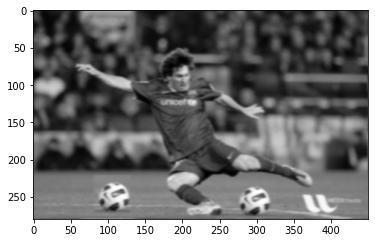

In [42]:
## Áp dụng lên ảnh
input_image = cv2.imread('images/messi.jpg', 0)

### YOUR CODE HERE ###
fft = np.fft.fft2(input_image)
fft_shift = np.fft.fftshift(fft)

shape = np.shape(input_image)
cutoff = 50
mask = get_gaussian_low_pass_filter(shape, cutoff)

filter_image = np.multiply(fft_shift, mask)


shift_ifft = np.fft.ifftshift(filter_image)
ifft = np.fft.ifft2(shift_ifft)


mag = np.abs(ifft)
### YOUR CODE HERE ###

# showing purpose only
plt.imshow(mag, cmap='gray')
plt.show()